In [48]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [11]:
online = pd.read_csv('online.csv')
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [12]:
# Convert 'InvoiceDate' column to datetime
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate']

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay']

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min')

online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25 08:26:00,2011-04-11 08:16:00
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20 11:56:00,2011-09-12 13:50:00
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14 13:35:00,2011-07-14 13:35:00
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23 15:53:00,2011-11-23 15:53:00
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25 13:36:00,2011-02-25 14:11:00


In [13]:
# Extract day, month, and year components
online['invoice_day'] = online['InvoiceDay'].dt.day
online['invoice_month'] = online['InvoiceDay'].dt.month
online['invoice_year'] = online['InvoiceDay'].dt.year

# Extract day, month, and year components
online['cohort_day'] = online['CohortDay'].dt.day
online['cohort_month'] = online['CohortDay'].dt.month
online['cohort_year'] = online['CohortDay'].dt.year

In [18]:
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,invoice_day,invoice_month,invoice_year,cohort_day,cohort_month,cohort_year,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25 08:26:00,2011-04-11 08:16:00,25,10,2011,11,4,2011,195
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20 11:56:00,2011-09-12 13:50:00,20,11,2011,12,9,2011,69
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14 13:35:00,2011-07-14 13:35:00,14,7,2011,14,7,2011,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23 15:53:00,2011-11-23 15:53:00,23,11,2011,23,11,2011,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25 13:36:00,2011-02-25 14:11:00,25,5,2011,25,2,2011,91


In [36]:
# Calculate difference in years
years_diff = online['invoice_year'] - online['cohort_year']

# Calculate difference in months
months_diff = online['invoice_month'] - online['cohort_month']

# Calculate difference in days
days_diff = online['invoice_day'] - online['cohort_day']

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 12 + months_diff +1

In [37]:
grouping = online.groupby(['cohort_month', 'CohortIndex'])

# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='cohort_month', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

retention.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
1,1.0,0.2,0.2,0.2,0.3,0.3,0.2,0.3,0.3,0.3,0.4,0.1,NaN
2,1.0,0.2,0.2,0.3,0.3,0.2,0.3,0.3,0.3,0.3,0.1,NaN,NaN
3,1.0,0.2,0.3,0.2,0.2,0.2,0.3,0.2,0.3,0.1,NaN,NaN,NaN
4,1.0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,NaN,NaN,NaN,NaN
5,1.0,0.2,0.2,0.1,0.2,0.2,0.2,0.1,NaN,NaN,NaN,NaN,NaN
6,1.0,0.2,0.1,0.2,0.2,0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,0.2,0.2,0.2,0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.2,0.2,0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,0.2,0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['cohort_month','CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='cohort_month', columns='CohortIndex', values='UnitPrice')
average_price.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
1,3.2,3.1,3.0,3.0,3.1,3.0,3.0,2.5,2.7,2.9,2.6,2.0,NaN
2,3.1,4.0,3.3,2.9,3.3,2.9,2.8,2.7,2.9,2.7,3.1,NaN,NaN
3,3.5,3.6,3.5,2.8,2.7,2.5,2.7,2.9,2.5,2.4,NaN,NaN,NaN
4,3.3,4.4,3.4,2.6,2.8,2.8,2.8,2.6,2.6,NaN,NaN,NaN,NaN
5,3.1,2.8,2.5,2.7,2.5,2.3,2.7,2.3,NaN,NaN,NaN,NaN,NaN
6,2.8,2.4,2.7,3.1,2.5,2.4,2.5,NaN,NaN,NaN,NaN,NaN,NaN
7,3.2,3.1,3.4,2.5,2.4,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.9,3.7,5.4,6.9,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.9,3.1,3.0,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


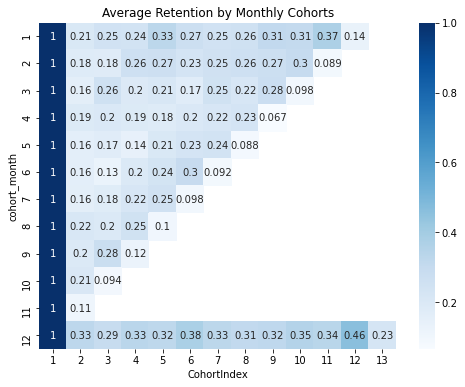

In [47]:
# Import seaborn package as sns
import seaborn as sns

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8,6))

# Add a title
plt.title('Average Retention by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention, annot=True, cmap='Blues')
plt.show()

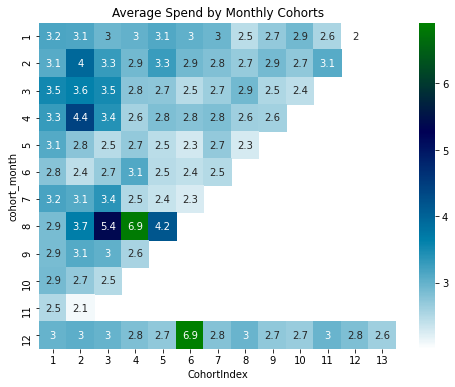

In [46]:
# Import seaborn package as sns
import seaborn as sns

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8,6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=average_price, annot=True, cmap='ocean_r')
plt.show()